In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import os
for dirname, _, filenames in os.walk('x-ray data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

x-ray data\covid\1-s2.0-S0140673620303706-fx1_lrg.jpg
x-ray data\covid\1-s2.0-S0929664620300449-gr2_lrg-a.jpg
x-ray data\covid\1-s2.0-S0929664620300449-gr2_lrg-b.jpg
x-ray data\covid\1-s2.0-S0929664620300449-gr2_lrg-c.jpg
x-ray data\covid\1-s2.0-S0929664620300449-gr2_lrg-d.jpg
x-ray data\covid\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
x-ray data\covid\auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
x-ray data\covid\auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
x-ray data\covid\auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
x-ray data\covid\covid (1).jpeg
x-ray data\covid\covid (1).jpg
x-ray data\covid\covid (1).png
x-ray data\covid\covid (10).jpeg
x-ray data\covid\covid (10).jpg
x-ray data\covid\covid (10).png
x-ray data\covid\covid (11).jpeg
x-ray data\covid\covid (11).jpg
x-ray data\covid\covid (11).png
x-ray data\covid\covid (12).jpeg
x-ray data\covid\covid (12).jpg
x-ray data\covid\

In [55]:
import tensorflow as tf
from keras import models  
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

In [56]:
DATASET_DIR = "x-ray data"
os.listdir(DATASET_DIR)

['covid', 'normal']

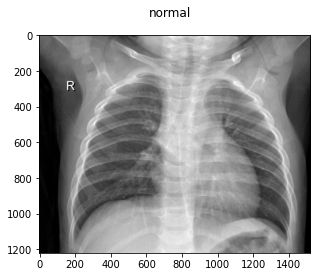

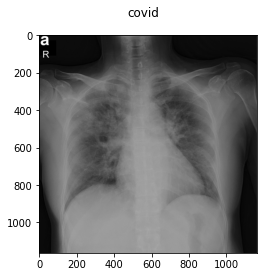

In [57]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 


covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[1], cmap='gray')

In [58]:
print(len(normal_images))
print(len(covid_images))

28
96


In [59]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3
INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 40
BATCH_SIZE = 20

In [60]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(INPUT_SHAPE)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [61]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                  metrics=['accuracy'])

In [62]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')


history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 88 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 1 steps
Epoch 1/40
4/4 [==============================] - 7s 2s/step - loss: 0.6610 - accuracy: 0.6324 - val_loss: 0.4188 - val_accuracy: 1.0000
Epoch 2/40
4/4 [==============================] - 5s 1s/step - loss: 0.9649 - accuracy: 0.7500 - val_loss: 0.4014 - val_accuracy: 1.0000
Epoch 3/40
4/4 [==============================] - 5s 1s/step - loss: 0.5052 - accuracy: 0.8088 - val_loss: 0.3998 - val_accuracy: 1.0000
Epoch 4/40
4/4 [==============================] - 5s 1s/step - loss: 0.4763 - accuracy: 0.8088 - val_loss: 0.2395 - val_accuracy: 1.0000
Epoch 5/40
4/4 [==============================] - 5s 1s/step - loss: 0.5830 - accuracy: 0.7500 - val_loss: 0.2851 - val_accuracy: 1.0000
Epoch 6/40
4/4 [==============================] - 5s 1s/step - loss: 0.5374 - accuracy: 0.7941 - val_loss: 0.1509 - val_accuracy: 1.0000
Epoch 7/

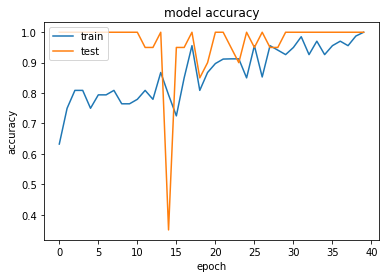

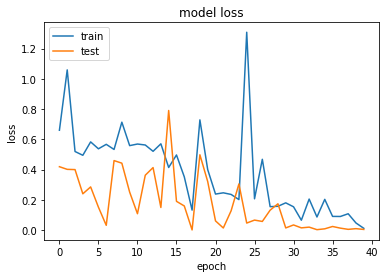

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 1.0
validation_accuracy 1.0


In [71]:
model.save("mymodel.model") 

INFO:tensorflow:Assets written to: mymodel.model\assets


In [67]:
# import keras
# import tensorflow as tf 

# model = tf.keras.models.load_model('my_model.h5')

In [68]:
label = validation_generator.classes

In [69]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']
